In [ ]:
#BPM detection and BPM histogram
#this is learned from essentia python example, for middle testing

In [53]:
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")
from essentia.standard import *

# Loading audio file
audio = MonoLoader(filename='../../../test/audio/ode1.wav')()

# Compute beat positions and BPM
rhythm_extractor = RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

print("BPM:", bpm)
print("Beat positions (sec.):", beats)
print("Beat estimation confidence:", beats_confidence)

BPM: 83.27534484863281
Beat positions (sec.): [ 0.8010884  1.6021768  2.3684354  3.1114738  3.8196824  4.551111
  5.27093    5.9907484  6.7337866  7.4884353  8.243084   8.974512
  9.705941  10.448979  11.203628  11.958277  12.724535  13.455963
 14.187392  14.90721   15.627029  16.335238  17.043446  17.786486
 18.517914  19.237732  19.92272   20.61932   21.397188  22.186666
 22.964535  23.742403  24.473831  25.193651  25.91347   26.621677
 27.306665  28.003265  28.699863  29.373241  30.093061  30.81288
 31.509478  32.206078  32.925896  33.680542  34.47002   35.27111
 36.00254   36.733967  37.453785  38.150383  38.835373  39.520363
 40.21696   40.91356   41.64499   42.353195  43.049793  43.758003
 44.466213  45.20925   45.963898  46.718548  47.461586 ]
Beat estimation confidence: 2.5614848136901855


Text(0.5, 1.0, 'Audio waveform and the estimated beat positions')

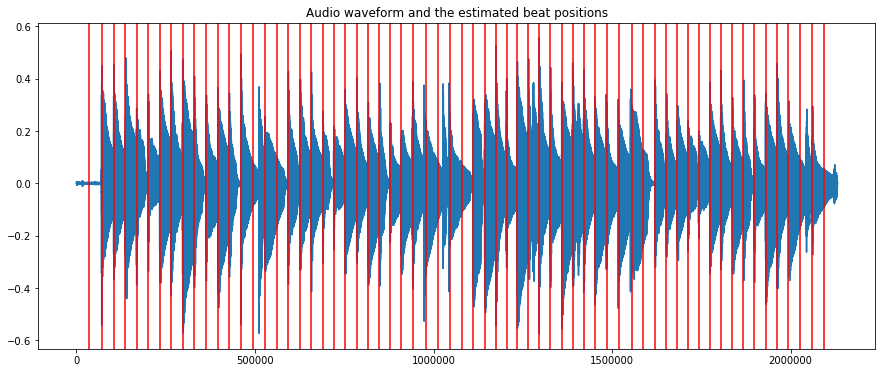

In [55]:
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default

plot(audio)
for beat in beats:
    plt.axvline(x=beat*44100, color='red')

plt.title("Audio waveform and the estimated beat positions")

Overall BPM (estimated before): 83.3
First histogram peak: 83.0 bpm
Second histogram peak: 88.0 bpm


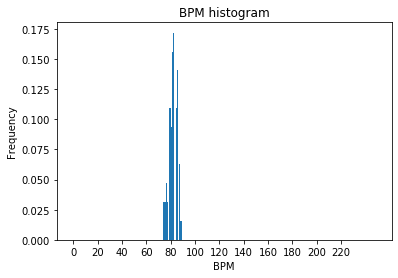

In [54]:
peak1_bpm, peak1_weight, peak1_spread, peak2_bpm, peak2_weight, peak2_spread, histogram = BpmHistogramDescriptors()(beats_intervals)

print("Overall BPM (estimated before): %0.1f" % bpm)
print("First histogram peak: %0.1f bpm" % peak1_bpm)
print("Second histogram peak: %0.1f bpm" % peak2_bpm)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
plt.title("BPM histogram")
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()

In [ ]:
#Onset Detection
#this is learned from essentia python example, for middle testing

In [56]:
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")
from essentia.standard import *

# Loading audio file
audio = MonoLoader(filename='../../../test/audio/ode_short_loud.wav')()

# use hfc method here
od1 = OnsetDetection(method='hfc')

w = Windowing(type = 'hann')
fft = FFT() 
c2p = CartesianToPolar() 
pool = essentia.Pool()

# Computing onset detection functions.
for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od1(mag, phase))
    

# compute the actual onsets locations
onsets = Onsets()

onsets_hfc = onsets(essentia.array([ pool['features.hfc'] ]), [ 1 ])


(588587,)
onset_hfc number
15
onset_hfc
[1590.566873550415, 2356.825351715088, 3111.47403717041, 3808.072566986084, 4562.721252441406, 5282.539844512939, 5990.748405456543, 6733.787059783936, 7488.4352684021, 8231.473922729492, 8974.512100219727, 9705.941200256348, 10437.369346618652, 11586.75765991211, 11946.666717529297]
onset_complex number
20


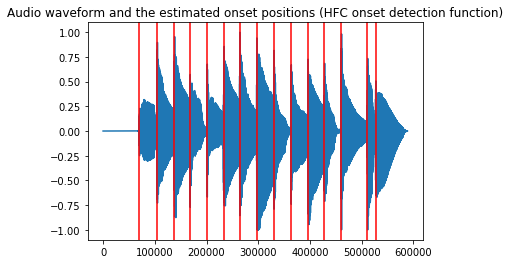

Text(0.5, 1.0, 'Audio waveform and the estimated onset positions (complex onset detection function)')

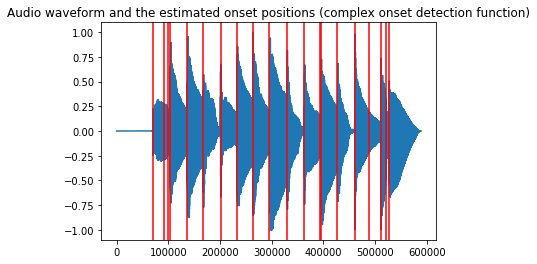

In [57]:
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
print(audio.shape)
#audio = time*44100
# audio x axis/hopsize == frame number in melody
# onset*44100/128 == frame number in melody
plot(audio)
print("onset_hfc number")
print(len(onsets_hfc))
print("onset_hfc")

onsets_hfc_ms=[]
for t in onsets_hfc:
    onsets_hfc_ms.append(t*1000)   
print(onsets_hfc_ms)

for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()

plot(audio)
for onset in onsets_complex:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (complex onset detection function)")

In [ ]:
#Frequency Detection
#this is modified from essentia python example, for middle testing

Duration of the audio sample [sec]:
9.793083900226758
frame numbers:
3376
pitch_values:
[0. 0. 0. ... 0. 0. 0.]
[  0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.     

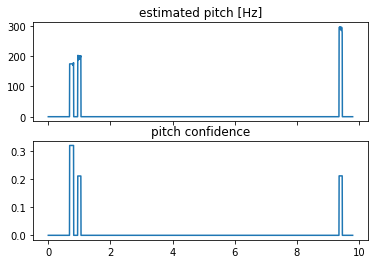

In [124]:
import numpy
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")
from essentia.standard import *
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt



# Load audio file; it is recommended to apply equal-loudness filter for PredominantPitchMelodia 
#loader = EqloudLoader(filename='../python/musicbricks-tutorials/flamenco.wav', sampleRate=44100)
#loader = EqloudLoader(filename='../../../test/audio/ode_short_loud.wav', sampleRate=44100)
loader = MonoLoader(filename='../../../test/audio/do.wav')
#loader = MonoLoader(filename='../../../test/audio/single/47.wav')
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/44100.0)


# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

print("frame numbers:")
print(len(pitch_values))

#i=1
#for onset in onsets_hfc:
    #print("onset number", i, ":")
    #print(pitch_values[(int(onset*44100/128)+20):(int(onset*44100/128)+40)])
    #i+=1
    
print("pitch_values:")
print(pitch_values)
print(pitch_values[3000:])

#print("pitch_confidence:")
#print(pitch_confidence)

# Pitch is estimated on frames. Compute frame time positions
pitch_times = numpy.linspace(0.0,len(audio)/44100.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.show()

In [ ]:
#Our own Algorithm

In [ ]:
#Algorithm

import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")
from essentia.standard import *
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.utils import get_array_type
import array
import numpy as np
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default

#pydub freq func
def frequency_spectrum(sample, max_frequency=4187):
    """
    Derive frequency spectrum of a signal pydub.AudioSample
    Returns an array of frequencies and an array of how prevelant that frequency is in the sample
    """
    # Convert pydub.AudioSample to raw audio data
    # Copied from Jiaaro's answer on https://stackoverflow.com/questions/32373996/pydub-raw-audio-data
    bit_depth = sample.sample_width * 8
    array_type = get_array_type(bit_depth)
    raw_audio_data = array.array(array_type, sample._data)
    n = len(raw_audio_data)

    # Compute FFT and frequency value for each index in FFT array
    # Inspired by Reveille's answer on https://stackoverflow.com/questions/53308674/audio-frequencies-in-python
    freq_array = np.arange(n) * (float(sample.frame_rate) / n)  # two sides frequency range
    freq_array = freq_array[: (n // 2)]  # one side frequency range

    raw_audio_data = raw_audio_data - np.average(raw_audio_data)  # zero-centering
    freq_magnitude = fft(raw_audio_data)  # fft computing and normalization
    freq_magnitude = freq_magnitude[: (n // 2)]  # one side

    if max_frequency:
        max_index = int(max_frequency * n / sample.frame_rate) + 1
        freq_array = freq_array[:max_index]
        freq_magnitude = freq_magnitude[:max_index]

    freq_magnitude = abs(freq_magnitude)
    freq_magnitude = freq_magnitude / np.sum(freq_magnitude)
    return freq_array, freq_magnitude

# Loading audio file
file = '../../../test/audio/ode1.m4a'
audio = MonoLoader(filename=file)()

od1 = OnsetDetection(method='hfc')

w = Windowing(type = 'hann')
fft = FFT() # this gives us a complex FFT
c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
pool = essentia.Pool()

# Computing onset detection functions.
for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od1(mag, phase))
    
onsets = Onsets()

onsets_hfc = onsets(essentia.array([ pool['features.hfc'] ]),[ 1 ])


#audio = time*44100
# audio x axis/hopsize == frame number in melody
# onset*44100/128 == frame number in melody
plot(audio)
print("onset_hfc number")
print(len(onsets_hfc))
print("onset_hfc_ms")

onsets_hfc_ms=[]
for t in onsets_hfc:
    onsets_hfc_ms.append(t*1000)
print(onsets_hfc_ms)
#print("onset_complex number")
#print(len(onsets_complex))

for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()

#standard freq
c4 = 261.626
d4 = 293.665
e4 = 329.629
f4 = 349.228
g4 = 391.995
g3 = 195.998
standard_freqs = [e4,e4,f4,g4,
           g4,f4,e4,d4,
           c4,c4,d4,e4,
           e4,d4,d4,
           e4,e4,f4,g4,
           g4,f4,e4,d4,
           c4,c4,d4,e4,
           d4,c4,c4,
           d4,d4,e4,c4,
           d4,e4,f4,e4,c4,
           d4,e4,f4,e4,d4,
           c4,d4,g3,
           e4,e4,f4,g4,
           g4,f4,e4,d4,
           c4,c4,d4,e4,
           d4,c4,c4]

#standard time
beat_index = [0,1,2,3,
              4,5,6,7,
              8,9,10,11,
              12,13.5,14,
              16,17,18,19,
              20,21,22,23,
              24,25,26,27,
              28,29.5,30,
              32,33,34,35,
              36,37,37.5,38,39,
              40,41,41.5,42,43,
              44,45,46,
              48,49,50,51,
              52,53,54,55,
              56,57,58,59,
              60,61.5,62]
bpm = 82
bt = 60 / bpm
#change when ok
start_time = onsets_hfc[3]
print("start_time:",start_time*44100/128)

#in sec
standard_time = []
for i in beat_index:
    standard_time.append(start_time + i*bt)
    
print("Duration of the audio sample [sec]:")
print(len(audio)/44100.0)

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

print("frame numbers:")
print(len(pitch_values))


#j=1
#for standard in standard_time:
    #print("note number", j, ":")
    #print(pitch_values[(int(standard*44100/128)):(int(standard*44100/128)+50)])
    #j+=1


#i=1
#for onset in onsets_hfc:
#    print("onset number", i, ":")
#    print(pitch_values[(int(onset*44100/128)+20):(int(onset*44100/128)+40)])
#    i+=1

    
#print("pitch_values:")
#print(pitch_values)
#print(pitch_values[300:1000])

#print("pitch_confidence:")
#print(pitch_confidence)


#examine correctness
error_tol = 2.5
total_num = len(standard_time)
#for storing periods with too many zeros, have to do segmentation and second examine
#elements are index
second_examine = []
#for storing examine result, initial all false
result = ["False"]*total_num

for t in range(0, total_num):
    standard_t = standard_time[t]
    #the freqs for examine, a period of time
    examine_freqs = pitch_values[(int(standard_t*44100/128)):(int(standard_t*44100/128)+50)]
    #how many zero in examine period
    zero_count = 0
    #how many correct freqs in examine period
    correct_count = 0
    #min freq and max freq with error tolerance
    standard_freq = standard_freqs[t]
    min_freq = standard_freq - error_tol
    max_freq = standard_freq + error_tol
    #examine freqs in examine period
    for freq in examine_freqs:
        if freq == 0:
            zero_count += 1
        if ((freq >= min_freq) and (freq <= max_freq)):
            correct_count += 1
    #see result
    if zero_count >= 10:
        # number may change later
        result[t] = "Wait"
        second_examine.append(t)
    else:
        if correct_count >=10:
            result[t] = "True"
        else:
            result[t] = "Wait"
            second_examine.append(t)

print("first result:")
print(result)
#second examine:
seg_files = []
song = AudioSegment.from_file(file, 'm4a')
for t in second_examine:
    standard_t = standard_time[t]
    #cut audio
    start = standard_t*1000 - 50  
    end = standard_t*1000 + 200
    seg = song[start:end]
    seg_filename = str(t)+".wav"
    #print(seg_filename)
    #freqs, freq_magnitudes = frequency_spectrum(seg)
    #print(freq_magnitudes)
    #new_freq = freqs[np.argmax(freq_magnitudes)]
    #print(new_freq)
    seg.export(seg_filename, format="wav")
    #get pitch
    seg_audio = MonoLoader(filename=seg_filename)()
    seg_pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
    seg_pitch_values, seg_pitch_confidence = seg_pitch_extractor(seg_audio)
    #print("pitch", t, ":",seg_pitch_values)
    #start examine
    correct_count = 0
    standard_freq = standard_freqs[t]
    min_freq = standard_freq - error_tol
    max_freq = standard_freq + error_tol
    for freq in seg_pitch_values:
        if ((freq >= min_freq) and (freq <= max_freq)):
            correct_count += 1
    print(correct_count)
    if correct_count >= 10:
        result[t] = "True"
    else:
        result[t] = "False"
print("second result:", result)
        
# Pitch is estimated on frames. Compute frame time positions
pitch_times = numpy.linspace(0.0,len(audio)/44100.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.show()
